# **Bibliotecas e Funções**

## ***Bibliotecas***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Scikit-Learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, svm, ensemble
from sklearn.neural_network import MLPClassifier

# OpenCV
import cv2

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ***Acessos Externos***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Overview do Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/CAP-421 Aprendizado Profundo/Dados_
Tabulados.csv", skiprows=[1,2])

# Imprime algumas informações básicas sobre os dados
print("Numero de linhas: {}".format(df.shape[0]))
print("Numero de colunas: {}".format(df.shape[1]))
print("Dados faltando: {}".format(df.isnull().sum().sum()))

print("\nAmostra:")
display(df.sample(10))

# Cria uma lista com as features
features = list(df.columns)

# print("Features:")
# print("\n".join(["  " + x for x in features]))
print(features)

mpl.rc('font', size=14)

Numero de linhas: 4324
Numero de colunas: 2054
Dados faltando: 0

Amostra:


,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2044,n2045,n2046,n2047,category,image name,image,size,width,height
3876,0.101499,0.275627,0.084514,0.000770,0.215730,0.019409,0.446200,0.190522,0.069239,0.031423,...,0.062946,0.078791,-0.272794,0.024986,selective-logging,extrac_Id_88645,selective-logging\extrac_Id_88645.tif,564,7,6
96,0.059940,0.200390,0.166229,0.009269,0.339185,0.046175,0.184456,0.149290,0.031987,0.045189,...,0.013015,0.062670,-0.130815,0.019710,non-logging,_Id_100448,non-logging\_Id_100448.tif,474,3,4
3321,0.176506,0.095844,0.027637,0.214539,0.144650,0.068555,0.465607,0.291145,0.061041,0.091836,...,0.079640,0.198212,-0.289247,0.030294,selective-logging,extrac_Id_100005,selective-logging\extrac_Id_100005.tif,618,5,12
4031,0.082641,0.262271,0.284871,0.114046,0.269687,0.008649,0.681417,0.210994,0.045290,0.044412,...,0.075842,0.133618,-0.289542,0.018037,selective-logging,extrac_Id_89332,selective-logging\extrac_Id_89332.tif,606,7,8
901,0.056922,0.230322,0.500564,0.150060,0.439918,0.162737,0.656263,0.178515,0.053838,0.045334,...,0.049896,0.059089,-0.193893,0.014002,non-logging,_Id_141811,non-logging\_Id_141811.tif,486,4,4
3031,0.097011,0.207250,0.125979,0.001297,0.388754,0.051412,0.324003,0.213306,0.032552,0.007092,...,0.039759,0.110348,-0.185004,0.014237,non-logging,_Id_90075,non-logging\_Id_90075.tif,474,4,3
4101,0.375879,0.462871,0.006653,0.016478,0.103361,0.087235,1.104794,0.502261,0.104471,0.478736,...,0.137255,0.420546,-0.573383,0.046758,selective-logging,extrac_Id_89607,selective-logging\extrac_Id_89607.tif,978,15,12
1806,0.035434,0.261046,0.548309,0.001736,0.489122,0.378691,0.339260,0.156373,0.033195,0.011840,...,0.005952,0.066244,-0.118659,0.014930,non-logging,_Id_397,non-logging\_Id_397.tif,483,3,5
138,0.110381,0.172680,0.201842,0.005880,0.333817,0.067248,0.517905,0.162897,0.045873,0.041881,...,0.079345,0.116341,-0.300545,0.031408,non-logging,_Id_100509,non-logging\_Id_100509.tif,513,5,5
1524,0.010642,0.250560,0.393424,0.012900,0.484931,0.215089,0.137863,0.013366,0.026460,0.087762,...,0.048585,0.022436,-0.018050,0.019014,non-logging,_Id_18725,non-logging\_Id_18725.tif,462,2,4


['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30', 'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50', 'n51', 'n52', 'n53', 'n54', 'n55', 'n56', 'n57', 'n58', 'n59', 'n60', 'n61', 'n62', 'n63', 'n64', 'n65', 'n66', 'n67', 'n68', 'n69', 'n70', 'n71', 'n72', 'n73', 'n74', 'n75', 'n76', 'n77', 'n78', 'n79', 'n80', 'n81', 'n82', 'n83', 'n84', 'n85', 'n86', 'n87', 'n88', 'n89', 'n90', 'n91', 'n92', 'n93', 'n94', 'n95', 'n96', 'n97', 'n98', 'n99', 'n100', 'n101', 'n102', 'n103', 'n104', 'n105', 'n106', 'n107', 'n108', 'n109', 'n110', 'n111', 'n112', 'n113', 'n114', 'n115', 'n116', 'n117', 'n118', 'n119', 'n120', 'n121', 'n122', 'n123', 'n124', 'n125', 'n126', 'n127', 'n128', 'n129', 'n130', 'n131', 'n132', 'n133', 'n134', 'n135', 'n136', 'n137', 'n138

## ***Dados Categóricos***

In [ ]:
# Colunas Não Numéricas
categ_cols = df.select_dtypes(exclude='number').columns

for c in categ_cols:
    display((df[c].value_counts().sort_index()/len(df)*100).round(2).to_frame(c +" (%)").T)

,non-logging,selective-logging
category (%),76.78,23.22


,_Id_100000,_Id_100001,_Id_100003,_Id_100011,_Id_100012,_Id_100013,_Id_100014,_Id_100015,_Id_100017,_Id_100022,...,extrac_Id_99972,extrac_Id_99974,extrac_Id_99975,extrac_Id_99979,extrac_Id_99982,extrac_Id_99987,extrac_Id_99988,extrac_Id_99989,extrac_Id_99993,extrac_Id_99997
image name (%),0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


,non-logging\_Id_100000.tif,non-logging\_Id_100001.tif,non-logging\_Id_100003.tif,non-logging\_Id_100011.tif,non-logging\_Id_100012.tif,non-logging\_Id_100013.tif,non-logging\_Id_100014.tif,non-logging\_Id_100015.tif,non-logging\_Id_100017.tif,non-logging\_Id_100022.tif,...,selective-logging\extrac_Id_99972.tif,selective-logging\extrac_Id_99974.tif,selective-logging\extrac_Id_99975.tif,selective-logging\extrac_Id_99979.tif,selective-logging\extrac_Id_99982.tif,selective-logging\extrac_Id_99987.tif,selective-logging\extrac_Id_99988.tif,selective-logging\extrac_Id_99989.tif,selective-logging\extrac_Id_99993.tif,selective-logging\extrac_Id_99997.tif
image (%),0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [ ]:
df = df.drop(['image name', 'image'], axis='columns')

Target = 'category'
display(df.head(10))

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2042,n2043,n2044,n2045,n2046,n2047,category,size,width,height
0,0.090541,0.121947,0.037683,0.010735,0.252230,0.410920,0.465873,0.216724,0.043125,0.013722,...,0.083581,0.127018,0.040700,0.090657,-0.209564,0.018886,non-logging,486,4,4
1,0.227457,0.092431,0.152203,0.066609,0.317773,0.102253,0.436826,0.241328,0.060888,0.125055,...,0.086613,0.297503,0.079843,0.227254,-0.297086,0.023349,non-logging,546,4,9
2,0.059055,0.248501,0.073207,0.051422,0.511338,0.141911,0.402423,0.142471,0.035194,0.011268,...,0.109487,0.113047,0.033457,0.079063,-0.127061,0.017875,non-logging,474,4,3
3,0.051142,0.288472,0.082735,0.212353,0.448080,0.002138,0.288093,0.138350,0.031382,0.032235,...,0.007694,0.010413,0.010385,0.058812,-0.085739,0.019660,non-logging,465,3,3
4,0.086373,0.131677,0.220017,0.009825,0.445947,0.215995,0.589709,0.254359,0.031581,0.189060,...,0.055609,0.091703,0.052871,0.062523,-0.173024,0.018156,non-logging,486,4,4
5,0.103356,0.129861,0.448108,0.003002,0.543271,0.062434,0.230731,0.100057,0.039345,0.029959,...,0.066550,0.169846,0.061981,0.124053,-0.246441,0.011853,non-logging,483,3,5
6,0.058987,0.231848,0.215721,0.077866,0.230256,0.040184,0.452550,0.148046,0.040371,0.039577,...,0.105227,0.087759,0.028993,0.058905,-0.150829,0.020022,non-logging,483,3,5
7,0.051030,0.196190,0.028907,0.002355,0.469986,0.005041,0.484038,0.129368,0.032997,0.034981,...,0.060967,0.172447,0.066373,0.040307,-0.186007,0.023325,non-logging,498,4,5
8,0.341670,0.048865,0.100525,0.003278,1.710031,0.160669,0.787547,0.618804,0.088959,0.515832,...,0.413158,0.580022,0.071346,0.452080,-0.765471,0.065083,non-logging,1815,27,17
9,0.078656,0.164757,0.116880,0.002822,0.482611,0.072727,0.503441,0.127616,0.040348,0.052826,...,0.029835,0.001045,0.059482,0.110786,-0.219070,0.021747,non-logging,513,5,5


## ***Dados Numéricos***

In [ ]:
features = df.select_dtypes(include=np.number).columns
features

Index(['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9',
       ...
       'n2041', 'n2042', 'n2043', 'n2044', 'n2045', 'n2046', 'n2047', 'size',
       'width', 'height'],
      dtype='object', length=2051)

### *Plot dos Dados Numéricos*

In [ ]:
# fig = plt.figure(figsize=(20,20))
# sns.pairplot(df.sample(20, axis='columns'));
# plt.savefig("/content/drive/MyDrive/Classroom/CAP-421 Aprendizado Profundo/Pairplot2.pdf")

In [ ]:
# fig = plt.figure(figsize=(20,20))
# sns.pairplot(df[features].sample(20, axis='columns'));

# **Preparação dos Dados**

## ***Normalização das Features***

In [ ]:
# Normalização dos Dados
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

df[features] = min_max_scaler.fit_transform(df[features])
df[features].describe()

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2041,n2042,n2043,n2044,n2045,n2046,n2047,size,width,height
count,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,...,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000
mean,0.178186,0.196642,0.197227,0.062616,0.153886,0.149025,0.314477,0.229009,0.247848,0.170315,...,0.349183,0.238838,0.121383,0.193962,0.235155,0.742185,0.232252,0.018931,0.071933,0.089979
std,0.118625,0.105403,0.193210,0.119331,0.151753,0.160822,0.152951,0.148014,0.162183,0.201741,...,0.133188,0.210130,0.150564,0.116642,0.184287,0.166406,0.141672,0.049401,0.087326,0.106485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094463,0.123564,0.046107,0.004032,0.062242,0.043130,0.210386,0.136856,0.125178,0.039321,...,0.254536,0.078058,0.020246,0.113244,0.103091,0.682154,0.146700,0.002000,0.025974,0.033898
50%,0.137926,0.200590,0.133780,0.008761,0.125775,0.095820,0.280628,0.191963,0.201653,0.083403,...,0.341020,0.170523,0.054612,0.173842,0.163224,0.788543,0.191416,0.004223,0.038961,0.050847
75%,0.228558,0.261213,0.279984,0.055435,0.187752,0.183740,0.383086,0.273507,0.332850,0.211281,...,0.429322,0.332935,0.170355,0.249063,0.316794,0.859184,0.262344,0.012001,0.077922,0.101695
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ***Target Numérico***

In [ ]:
df[Target] = (df[Target] == "selective-logging").astype(int)
display((df[Target].value_counts()/len(df)*100).round(2).to_frame(Target +" (%)").T)

,0,1
category (%),76.78,23.22


## ***Split dos Dados***

In [ ]:
x_train, x_rem, y_train, y_rem = train_test_split(df[features], df[Target], train_size=0.8)

x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

print("Features:")
print("Treinamento:", x_train.shape, "\tValidação:", x_valid.shape, "\tTeste:", x_test.shape)
# print("Treinamento:", x_train.shape, "\tValidação:", x_valid.shape)

print("\nTarget:")
print("Treinamento:", y_train.shape, "\t\tValidação:", y_valid.shape, "\tTeste:", y_test.shape)
# print("Treinamento:", y_train.shape, "\t\tValidação:", y_valid.shape)

Features:
Treinamento: (3459, 2051) 	Validação: (432, 2051) 	Teste: (433, 2051)

Target:
Treinamento: (3459,) 		Validação: (432,) 	Teste: (433,)


# **Aplicação de Redes Neurais**

In [ ]:
x = range(len(features))

## ***KNN (K Nearest Neighbours)***

In [ ]:
# Define uma funcao que recebe o numero k de vizinhos,
def test_knn_ball(k):
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,
                                       algorithm='ball_tree')

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Número de Regiões: {}".format(k))
  print("Acurácia de treino: {:.3}".format(train_acc))
  print("Acurácia de validação: {:.3}".format(val_acc))

def test_knn_tree(k):
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,
                                       algorithm='kd_tree')

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Número de Regiões: {}".format(k))
  print("Acurácia de treino: {:.3}".format(train_acc))
  print("Acurácia de validação: {:.3}".format(val_acc))

def test_knn_brute(k):
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,
                                       algorithm='brute')

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Número de Regiões: {}".format(k))
  print("Acurácia de treino: {:.3}".format(train_acc))
  print("Acurácia de validação: {:.3}".format(val_acc))

In [ ]:
print("Ball:")
test_knn_ball(3)

print("\nTree:")
test_knn_tree(3)

print("\nBrute:")
test_knn_brute(3)

Ball:
Número de Regiões: 3
Acurácia de treino: 0.945
Acurácia de validação: 0.907

Tree:
Número de Regiões: 3
Acurácia de treino: 0.946
Acurácia de validação: 0.907

Brute:
Número de Regiões: 3
Acurácia de treino: 0.946
Acurácia de validação: 0.907


In [ ]:
print("Ball:")
test_knn_ball(5)

print("\nTree:")
test_knn_tree(5)

print("\nBrute:")
test_knn_brute(5)

Ball:
Número de Regiões: 5
Acurácia de treino: 0.936
Acurácia de validação: 0.9

Tree:
Número de Regiões: 5
Acurácia de treino: 0.936
Acurácia de validação: 0.9

Brute:
Número de Regiões: 5
Acurácia de treino: 0.936
Acurácia de validação: 0.9


In [ ]:
print("Ball:")
test_knn_ball(15)

print("\nTree:")
test_knn_tree(15)

print("\nBrute:")
test_knn_brute(15)

Ball:
Número de Regiões: 15
Acurácia de treino: 0.934
Acurácia de validação: 0.912

Tree:
Número de Regiões: 15
Acurácia de treino: 0.934
Acurácia de validação: 0.912

Brute:
Número de Regiões: 15
Acurácia de treino: 0.934
Acurácia de validação: 0.912


In [ ]:
print("Ball:")
test_knn_ball(49)

print("\nTree:")
test_knn_tree(49)

print("\nBrute:")
test_knn_brute(49)

Ball:
Número de Regiões: 49
Acurácia de treino: 0.922
Acurácia de validação: 0.928

Tree:
Número de Regiões: 49
Acurácia de treino: 0.922
Acurácia de validação: 0.928

Brute:
Número de Regiões: 49
Acurácia de treino: 0.922
Acurácia de validação: 0.928


In [ ]:
print("Ball:")
test_knn_ball(99)

print("\nTree:")
test_knn_tree(99)

print("\nBrute:")
test_knn_brute(99)

Ball:
Número de Regiões: 99
Acurácia de treino: 0.919
Acurácia de validação: 0.924

Tree:
Número de Regiões: 99
Acurácia de treino: 0.919
Acurácia de validação: 0.924

Brute:
Número de Regiões: 99
Acurácia de treino: 0.919
Acurácia de validação: 0.924


## ***AdaBoost***

In [ ]:
def test_adaboost(N):
  clf = ensemble.AdaBoostClassifier(n_estimators=N)

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Número de Estimadores: {}".format(N))
  print("Máximas Relevâncias: {:.5}, {:.5}, {:.5}, {:.5}, {:.5}".format(sorted(clf.feature_importances_)[-1],
                                                                        sorted(clf.feature_importances_)[-2],
                                                                        sorted(clf.feature_importances_)[-3],
                                                                        sorted(clf.feature_importances_)[-4],
                                                                        sorted(clf.feature_importances_)[-5]))
  print("Acurácia de treino: {:.3}".format(train_acc))
  print("Acurácia de validação: {:.3}".format(val_acc))

In [ ]:
test_adaboost(3)

Número de Estimadores: 3
Máximas Relevâncias: 0.33333, 0.33333, 0.33333, 0.0, 0.0
Acurácia de treino: 0.905
Acurácia de validação: 0.9


In [ ]:
test_adaboost(5)

Número de Estimadores: 5
Máximas Relevâncias: 0.2, 0.2, 0.2, 0.2, 0.2
Acurácia de treino: 0.908
Acurácia de validação: 0.903


In [ ]:
test_adaboost(15)

Número de Estimadores: 15
Máximas Relevâncias: 0.13333, 0.066667, 0.066667, 0.066667, 0.066667
Acurácia de treino: 0.913
Acurácia de validação: 0.907


In [ ]:
test_adaboost(49)

Número de Estimadores: 49
Máximas Relevâncias: 0.040816, 0.020408, 0.020408, 0.020408, 0.020408
Acurácia de treino: 0.941
Acurácia de validação: 0.9


In [ ]:
test_adaboost(99)

Número de Estimadores: 99
Máximas Relevâncias: 0.020202, 0.020202, 0.020202, 0.010101, 0.010101
Acurácia de treino: 0.97
Acurácia de validação: 0.905


## ***Random Forest***

In [ ]:
def test_rf(N, max_depth):
  clf = ensemble.RandomForestClassifier(n_estimators=N,
                                        max_depth=max_depth)

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Número de Estimadores: {}".format(N))
  print("Profundidade: {}".format(max_depth))
  print("Máximas Relevâncias: {:.3}, {:.3}, {:.3}, {:.3}, {:.3}".format(sorted(clf.feature_importances_)[-1],
                                                                        sorted(clf.feature_importances_)[-2],
                                                                        sorted(clf.feature_importances_)[-3],
                                                                        sorted(clf.feature_importances_)[-4],
                                                                        sorted(clf.feature_importances_)[-5]))
  print("Acurácia de treino: {:.3}".format(train_acc))
  print("Acurácia de validação: {:.3}".format(val_acc))

In [ ]:
print("Depth None:")
test_rf(3, None)

print("\nDepth 5:")
test_rf(3, 5)

print("\nDepth 10:")
test_rf(3, 10)

Depth None:
Número de Estimadores: 3
Profundidade: None
Máximas Relevâncias: 0.168, 0.166, 0.153, 0.0241, 0.0143
Acurácia de treino: 0.98
Acurácia de validação: 0.894

Depth 5:
Número de Estimadores: 3
Profundidade: 5
Máximas Relevâncias: 0.221, 0.221, 0.181, 0.0453, 0.0161
Acurácia de treino: 0.942
Acurácia de validação: 0.919

Depth 10:
Número de Estimadores: 3
Profundidade: 10
Máximas Relevâncias: 0.201, 0.165, 0.164, 0.0206, 0.018
Acurácia de treino: 0.965
Acurácia de validação: 0.905


In [ ]:
print("Depth None:")
test_rf(5, None)

print("\nDepth 5:")
test_rf(5, 5)

print("\nDepth 10:")
test_rf(5, 10)

Depth None:
Número de Estimadores: 5
Profundidade: None
Máximas Relevâncias: 0.193, 0.102, 0.0934, 0.0931, 0.0147
Acurácia de treino: 0.988
Acurácia de validação: 0.9

Depth 5:
Número de Estimadores: 5
Profundidade: 5
Máximas Relevâncias: 0.128, 0.128, 0.12, 0.116, 0.115
Acurácia de treino: 0.941
Acurácia de validação: 0.919

Depth 10:
Número de Estimadores: 5
Profundidade: 10
Máximas Relevâncias: 0.117, 0.103, 0.102, 0.0953, 0.0924
Acurácia de treino: 0.974
Acurácia de validação: 0.926


In [ ]:
print("Depth None:")
test_rf(15, None)

print("\nDepth 5:")
test_rf(15, 5)

print("\nDepth 10:")
test_rf(15, 10)

Depth None:
Número de Estimadores: 15
Profundidade: None
Máximas Relevâncias: 0.0737, 0.0371, 0.0354, 0.034, 0.0337
Acurácia de treino: 0.997
Acurácia de validação: 0.9

Depth 5:
Número de Estimadores: 15
Profundidade: 5
Máximas Relevâncias: 0.0944, 0.0809, 0.0804, 0.0786, 0.0541
Acurácia de treino: 0.943
Acurácia de validação: 0.917

Depth 10:
Número de Estimadores: 15
Profundidade: 10
Máximas Relevâncias: 0.0421, 0.039, 0.0379, 0.0378, 0.0362
Acurácia de treino: 0.979
Acurácia de validação: 0.921


In [ ]:
print("Depth None:")
test_rf(49, None)

print("\nDepth 5:")
test_rf(49, 5)

print("\nDepth 10:")
test_rf(49, 10)

Depth None:
Número de Estimadores: 49
Profundidade: None
Máximas Relevâncias: 0.0298, 0.0289, 0.0278, 0.0248, 0.0233
Acurácia de treino: 0.998
Acurácia de validação: 0.912

Depth 5:
Número de Estimadores: 49
Profundidade: 5
Máximas Relevâncias: 0.0465, 0.0407, 0.0302, 0.0289, 0.0272
Acurácia de treino: 0.946
Acurácia de validação: 0.919

Depth 10:
Número de Estimadores: 49
Profundidade: 10
Máximas Relevâncias: 0.0395, 0.0329, 0.0302, 0.0212, 0.021
Acurácia de treino: 0.98
Acurácia de validação: 0.914


In [ ]:
print("Depth None:")
test_rf(99, None)

print("\nDepth 5:")
test_rf(99, 5)

print("\nDepth 10:")
test_rf(99, 10)

Depth None:
Número de Estimadores: 99
Profundidade: None
Máximas Relevâncias: 0.0357, 0.0278, 0.0216, 0.0199, 0.014
Acurácia de treino: 0.998
Acurácia de validação: 0.921

Depth 5:
Número de Estimadores: 99
Profundidade: 5
Máximas Relevâncias: 0.0359, 0.033, 0.0252, 0.0228, 0.0215
Acurácia de treino: 0.944
Acurácia de validação: 0.924

Depth 10:
Número de Estimadores: 99
Profundidade: 10
Máximas Relevâncias: 0.0371, 0.0312, 0.0199, 0.0196, 0.0157
Acurácia de treino: 0.983
Acurácia de validação: 0.917


## ***SVM (Support Vector Machines)***

In [ ]:
def test_svm_linear(C):
  clf = svm.SVC(C=C,
                kernel='linear',
                gamma='auto')

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Parâmetro Regulador: {}".format(C))
  print("Acuracia de treino: {:.3}".format(train_acc))
  print("Acuracia de validação: {:.3}".format(val_acc))

def test_svm_poly(C):
  clf = svm.SVC(C=C,
                kernel='poly',
                gamma='auto')

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Parâmetro Regulador: {}".format(C))
  print("Acuracia de treino: {:.3}".format(train_acc))
  print("Acuracia de validação: {:.3}".format(val_acc))

def test_svm_rbf(C):
  clf = svm.SVC(C=C,
                kernel='rbf',
                gamma='auto')

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Parâmetro Regulador: {}".format(C))
  print("Acuracia de treino: {:.3}".format(train_acc))
  print("Acuracia de validação: {:.3}".format(val_acc))

def test_svm_sig(C):
  clf = svm.SVC(C=C,
                kernel='sigmoid',
                gamma='auto')

  clf = clf.fit(x_train, y_train)

  train_acc = clf.score(x_train, y_train)
  val_acc = clf.score(x_valid, y_valid)

  print("Parâmetro Regulador: {}".format(C))
  print("Acuracia de treino: {:.3}".format(train_acc))
  print("Acuracia de validação: {:.3}".format(val_acc))

In [ ]:
print("Linear:")
test_svm_linear(.1)

print("\nPolynomial:")
test_svm_poly(.1)

print("\nRBF:")
test_svm_rbf(.1)

print("\nSigmoid:")
test_svm_sig(.1)

Linear:
Parâmetro Regulador: 0.1
Acuracia de treino: 0.951
Acuracia de validação: 0.928

Polynomial:
Parâmetro Regulador: 0.1
Acuracia de treino: 0.768
Acuracia de validação: 0.789

RBF:
Parâmetro Regulador: 0.1
Acuracia de treino: 0.881
Acuracia de validação: 0.894

Sigmoid:
Parâmetro Regulador: 0.1
Acuracia de treino: 0.873
Acuracia de validação: 0.896


In [ ]:
print("Linear:")
test_svm_linear(1)

print("\nPolynomial:")
test_svm_poly(1)

print("\nRBF:")
test_svm_rbf(1)

print("\nSigmoid:")
test_svm_sig(1)

Linear:
Parâmetro Regulador: 1
Acuracia de treino: 0.983
Acuracia de validação: 0.903

Polynomial:
Parâmetro Regulador: 1
Acuracia de treino: 0.851
Acuracia de validação: 0.877

RBF:
Parâmetro Regulador: 1
Acuracia de treino: 0.91
Acuracia de validação: 0.924

Sigmoid:
Parâmetro Regulador: 1
Acuracia de treino: 0.903
Acuracia de validação: 0.917


In [ ]:
print("Linear:")
test_svm_linear(5)

print("\nPolynomial:")
test_svm_poly(5)

print("\nRBF:")
test_svm_rbf(5)

print("\nSigmoid:")
test_svm_sig(5)

Linear:
Parâmetro Regulador: 5
Acuracia de treino: 0.998
Acuracia de validação: 0.877

Polynomial:
Parâmetro Regulador: 5
Acuracia de treino: 0.881
Acuracia de validação: 0.898

RBF:
Parâmetro Regulador: 5
Acuracia de treino: 0.924
Acuracia de validação: 0.921

Sigmoid:
Parâmetro Regulador: 5
Acuracia de treino: 0.921
Acuracia de validação: 0.924


In [ ]:
print("Linear:")
test_svm_linear(10)

print("\nPolynomial:")
test_svm_poly(10)

print("\nRBF:")
test_svm_rbf(10)

print("\nSigmoid:")
test_svm_sig(10)

Linear:
Parâmetro Regulador: 10
Acuracia de treino: 0.998
Acuracia de validação: 0.87

Polynomial:
Parâmetro Regulador: 10
Acuracia de treino: 0.89
Acuracia de validação: 0.903

RBF:
Parâmetro Regulador: 10
Acuracia de treino: 0.929
Acuracia de validação: 0.921

Sigmoid:
Parâmetro Regulador: 10
Acuracia de treino: 0.924
Acuracia de validação: 0.921


## ***MLP (Multilayer Perceptron)***

In [ ]:
def mlp_line(hidden):
    clf = MLPClassifier(hidden_layer_sizes=(hidden),
                        activation='identity',
                        solver='adam',
                        learning_rate='adaptive',
                        max_iter=500,
                        verbose=False)

    clf = clf.fit(x_train, y_train)

    train_acc = clf.score(x_train, y_train)
    val_acc = clf.score(x_valid, y_valid)

    print("Camadas escondidas: {}".format(hidden))
    print("Número de Iterações: {}".format(clf.n_iter_))
    print("Loss Mínimo: {:.5}".format(clf.best_loss_))
    print("Acurácia de treino: {:.3}".format(train_acc))
    print("Acurácia de validação: {:.3}".format(val_acc))

def mlp_relu(hidden):
    clf = MLPClassifier(hidden_layer_sizes=(hidden),
                        activation='relu',
                        solver='adam',
                        learning_rate='adaptive',
                        max_iter=500,
                        verbose=False)

    clf = clf.fit(x_train, y_train)

    train_acc = clf.score(x_train, y_train)
    val_acc = clf.score(x_valid, y_valid)

    print("Camadas escondidas: {}".format(hidden))
    print("Número de Iterações: {}".format(clf.n_iter_))
    print("Loss Mínimo: {:.5}".format(clf.best_loss_))
    print("Acurácia de treino: {:.3}".format(train_acc))
    print("Acurácia de validação: {:.3}".format(val_acc))

def mlp_sigmoid(hidden):
    clf = MLPClassifier(hidden_layer_sizes=(hidden),
                        activation='logistic',
                        solver='adam',
                        learning_rate='adaptive',
                        max_iter=500,
                        verbose=False)

    clf = clf.fit(x_train, y_train)

    train_acc = clf.score(x_train, y_train)
    val_acc = clf.score(x_valid, y_valid)

    print("Camadas escondidas: {}".format(hidden))
    print("Número de Iterações: {}".format(clf.n_iter_))
    print("Loss Mínimo: {:.5}".format(clf.best_loss_))
    print("Acurácia de treino: {:.3}".format(train_acc))
    print("Acurácia de validação: {:.3}".format(val_acc))

def mlp_tanh(hidden):
    clf = MLPClassifier(hidden_layer_sizes=(hidden),
                        activation='tanh',
                        solver='adam',
                        learning_rate='adaptive',
                        max_iter=500,
                        verbose=False)

    clf = clf.fit(x_train, y_train)

    train_acc = clf.score(x_train, y_train)
    val_acc = clf.score(x_valid, y_valid)

    print("Camadas escondidas: {}".format(hidden))
    print("Número de Iterações: {}".format(clf.n_iter_))
    print("Loss Mínimo: {:.5}".format(clf.best_loss_))
    print("Acurácia de treino: {:.3}".format(train_acc))
    print("Acurácia de validação: {:.3}".format(val_acc))

In [ ]:
print("Identidade")
mlp_line((20))

print("\nRelu")
mlp_relu((20))

print("\nSigmoide")
mlp_sigmoid((20))

print("\nTanh")
mlp_tanh((20))

Identidade
Camadas escondidas: 20
Número de Iterações: 115
Loss Mínimo: 0.1194
Acurácia de treino: 0.96
Acurácia de validação: 0.921

Relu
Camadas escondidas: 20
Número de Iterações: 110
Loss Mínimo: 0.12652
Acurácia de treino: 0.95
Acurácia de validação: 0.907

Sigmoide
Camadas escondidas: 20
Número de Iterações: 417
Loss Mínimo: 0.043903
Acurácia de treino: 0.99
Acurácia de validação: 0.9

Tanh
Camadas escondidas: 20
Número de Iterações: 389
Loss Mínimo: 0.011825
Acurácia de treino: 0.998
Acurácia de validação: 0.903


In [ ]:
print("Identidade")
mlp_line((20, 20))

print("\nRelu")
mlp_relu((20, 20))

print("\nSigmoide")
mlp_sigmoid((20, 20))

print("\nTanh")
mlp_tanh((20, 20))

Identidade
Camadas escondidas: (20, 20)
Número de Iterações: 77
Loss Mínimo: 0.13465
Acurácia de treino: 0.931
Acurácia de validação: 0.905

Relu
Camadas escondidas: (20, 20)
Número de Iterações: 191
Loss Mínimo: 0.032703
Acurácia de treino: 0.988
Acurácia de validação: 0.903

Sigmoide
Camadas escondidas: (20, 20)
Número de Iterações: 432
Loss Mínimo: 0.0091742
Acurácia de treino: 0.997
Acurácia de validação: 0.914

Tanh
Camadas escondidas: (20, 20)
Número de Iterações: 176
Loss Mínimo: 0.030874
Acurácia de treino: 0.99
Acurácia de validação: 0.905


In [ ]:
print("Identidade")
mlp_line((20, 10, 20))

print("\nRelu")
mlp_relu((20, 10, 20))

print("\nSigmoide")
mlp_sigmoid((20, 10, 20))

print("\nTanh")
mlp_tanh((20, 10, 20))

Identidade
Camadas escondidas: (20, 10, 20)
Número de Iterações: 105
Loss Mínimo: 0.10527
Acurácia de treino: 0.965
Acurácia de validação: 0.917

Relu
Camadas escondidas: (20, 10, 20)
Número de Iterações: 307
Loss Mínimo: 0.013088
Acurácia de treino: 0.99
Acurácia de validação: 0.875

Sigmoide
Camadas escondidas: (20, 10, 20)
Número de Iterações: 371
Loss Mínimo: 0.016911
Acurácia de treino: 0.997
Acurácia de validação: 0.9

Tanh
Camadas escondidas: (20, 10, 20)
Número de Iterações: 140
Loss Mínimo: 0.036143
Acurácia de treino: 0.934
Acurácia de validação: 0.88


In [ ]:
print("Identidade")
mlp_line((20, 10, 10, 20))

print("\nRelu")
mlp_relu((20, 10, 10, 20))

print("\nSigmoide")
mlp_sigmoid((20, 10, 10, 20))

print("\nTanh")
mlp_tanh((20, 10, 10, 20))

Identidade
Camadas escondidas: (20, 10, 10, 20)
Número de Iterações: 104
Loss Mínimo: 0.10709
Acurácia de treino: 0.917
Acurácia de validação: 0.903

Relu
Camadas escondidas: (20, 10, 10, 20)
Número de Iterações: 165
Loss Mínimo: 0.069234
Acurácia de treino: 0.975
Acurácia de validação: 0.914

Sigmoide
Camadas escondidas: (20, 10, 10, 20)
Número de Iterações: 356
Loss Mínimo: 0.037867
Acurácia de treino: 0.993
Acurácia de validação: 0.903

Tanh
Camadas escondidas: (20, 10, 10, 20)
Número de Iterações: 169
Loss Mínimo: 0.063202
Acurácia de treino: 0.975
Acurácia de validação: 0.917


# **Matriz de Confusão**

In [ ]:
classes = (['non-logging', 'selective-loggin'])

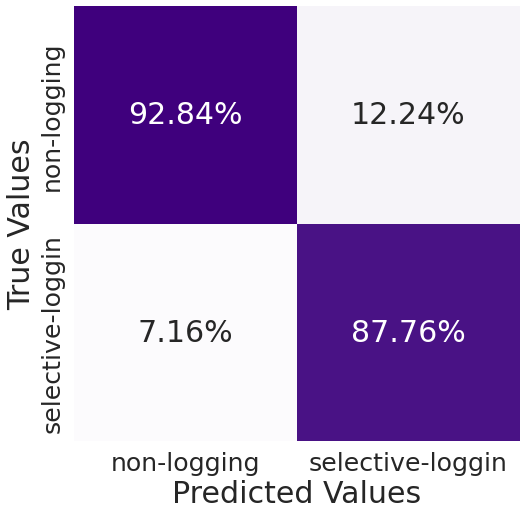

In [ ]:
#@title ***KNN***
knn_neighbor = 49

# KNN
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=knn_neighbor)
knn_clf = knn_clf.fit(x_train, y_train)
val_knn = knn_clf.predict(x_test)

cm = confusion_matrix(y_test, val_knn)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2.3) #for label size
sns.heatmap(cm/cm.sum(axis=0), annot=True, annot_kws={"size": 30}, fmt='.2%',
            cbar = False, cmap='Purples', xticklabels=classes, yticklabels=classes);
ax.set_ylabel('True Values',fontsize=30)
ax.set_xlabel('Predicted Values',fontsize=30)
plt.show()

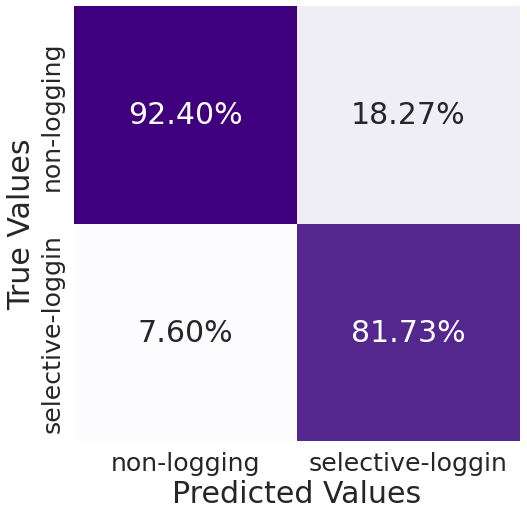

In [ ]:
#@title ***AdaBoost***
ab_estimator = 15

# AdaBoost
ab_clf = ensemble.AdaBoostClassifier(n_estimators=ab_estimator)
ab_clf = ab_clf.fit(x_train, y_train)
val_ab = ab_clf.predict(x_test)

cm = confusion_matrix(y_test, val_ab)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2.3) #for label size
sns.heatmap(cm/cm.sum(axis=0), annot=True, annot_kws={"size": 30}, fmt='.2%',
            cbar = False, cmap='Purples', xticklabels=classes, yticklabels=classes);
ax.set_ylabel('True Values',fontsize=30)
ax.set_xlabel('Predicted Values',fontsize=30)
plt.show()

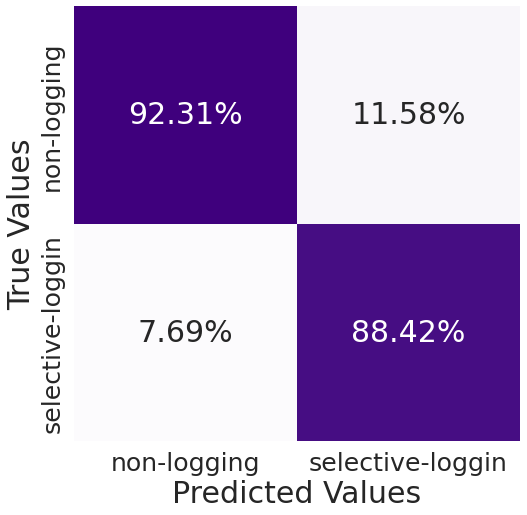

In [ ]:
#@title ***Random Forest***
rf_tree = 5
rf_depth = 10

# Random Forest
rf_clf = ensemble.RandomForestClassifier(n_estimators=rf_tree, max_depth=rf_depth)
rf_clf = rf_clf.fit(x_train, y_train)
val_rf = rf_clf.predict(x_test)

cm = confusion_matrix(y_test, val_rf)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2.3) #for label size
sns.heatmap(cm/cm.sum(axis=0), annot=True, annot_kws={"size": 30}, fmt='.2%',
            cbar = False, cmap='Purples', xticklabels=classes, yticklabels=classes);
ax.set_ylabel('True Values',fontsize=30)
ax.set_xlabel('Predicted Values',fontsize=30)
plt.show()

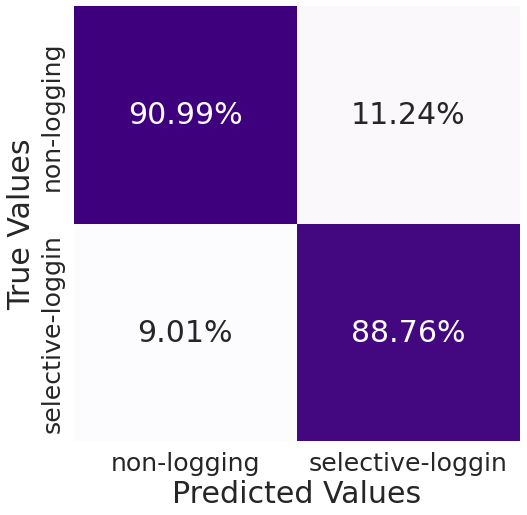

In [ ]:
#@title ***SVM***
svm_sup = 1
svm_kernel = 'rbf'

# SVM
svm_clf = svm.SVC(C=svm_sup, kernel=svm_kernel, gamma='auto')
svm_clf = svm_clf.fit(x_train, y_train)
val_svm = svm_clf.predict(x_test)

cm = confusion_matrix(y_test, val_svm)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2.3) #for label size
sns.heatmap(cm/cm.sum(axis=0), annot=True, annot_kws={"size": 30}, fmt='.2%',
            cbar = False, cmap='Purples', xticklabels=classes, yticklabels=classes);
ax.set_ylabel('True Values',fontsize=30)
ax.set_xlabel('Predicted Values',fontsize=30)
plt.show()

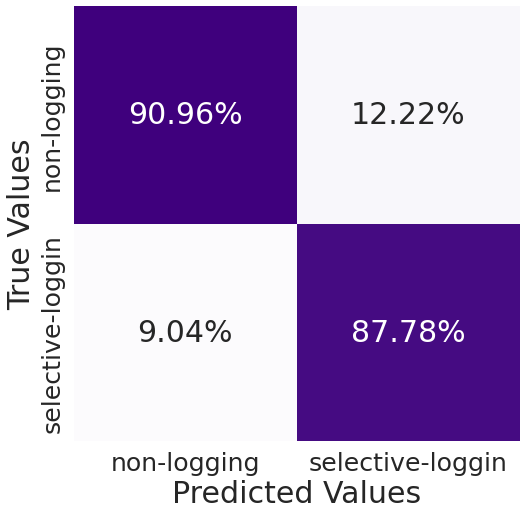

In [ ]:
#@title ***MLP***
mlp_arch = (20, 10, 10, 20)
mlp_activation = 'tanh'

# MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(mlp_arch), activation=mlp_activation, solver='adam', learning_rate='adaptive', max_iter=500, verbose=False)
mlp_clf = mlp_clf.fit(x_train, y_train)
val_mlp = mlp_clf.predict(x_test)

cm = confusion_matrix(y_test, val_mlp)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2.3) #for label size
sns.heatmap(cm/cm.sum(axis=0), annot=True, annot_kws={"size": 30}, fmt='.2%',
            cbar = False, cmap='Purples', xticklabels=classes, yticklabels=classes);
ax.set_ylabel('True Values',fontsize=30)
ax.set_xlabel('Predicted Values',fontsize=30)
plt.show()